In [1]:
# import the required packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1. Data

## 1.1 World Covid 19 Data

In [2]:
# Link to access data from John Hopkins University Github
time_series_covid19_confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
time_series_covid19_deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
time_series_covid19_recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [3]:
# Read file to the Pandas DataFrame 
confirmed_global = pd.read_csv(time_series_covid19_confirmed_global)
death_global = pd.read_csv(time_series_covid19_deaths_global)
recovered_global = pd.read_csv(time_series_covid19_recovered_global)

## 1.1.1 Checking the Data

In [4]:
# Shape of Global Covid 19 files
print("The shpe of Global confirmed cases are :", confirmed_global.shape)
print("The shpe of Global death cases are :", death_global.shape)
print("The shpe of Global recovered cases are :", recovered_global.shape)

#Note:
print("Note:")
print(" There are some discripencies in the three dataframe")

The shpe of Global confirmed cases are : (266, 178)
The shpe of Global death cases are : (266, 178)
The shpe of Global recovered cases are : (253, 178)
Note:
 There are some discripencies in the three dataframe


In [5]:
confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [6]:
death_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,826,864,898,920,936,957,971,994,1010,1012
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,74,76,79,81,83,83,85,89,93,95
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,946,952,959,968,978,988,996,1004,1011,1018
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,21,21,22,23,23,26,26


In [7]:
recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,800,800,800,800,802,802,803,803,803,803
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,108,108,108,117,117,117,117,118,118,118


# 1.1.2.  Exploring the Worldwide COVID 19 Data 

## 1.1. 2.1 Agregating the Worldwide Data by country

In [8]:
agg_confirmed = confirmed_global.groupby(['Country/Region']).sum().reset_index()
agg_death = death_global.groupby(['Country/Region']).sum().reset_index()
agg_recovered = recovered_global.groupby(['Country/Region']).sum().reset_index()

In [9]:
agg_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [10]:
# Shape of the Agregated Data at the country level
print("The shpe of Agregated global confirmed cases are :", agg_confirmed.shape)
print("The shpe of Agregated global death cases are :", agg_death.shape)
print("The shpe of Agregated global recovered cases are :", agg_recovered.shape)

#Note:
print("Note:")
print(" The discripencies are solved at the agregate level")

The shpe of Agregated global confirmed cases are : (188, 177)
The shpe of Agregated global death cases are : (188, 177)
The shpe of Agregated global recovered cases are : (188, 177)
Note:
 The discripencies are solved at the agregate level


In [11]:
agg_confirmed.columns

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20',
       '7/11/20', '7/12/20', '7/13/20'],
      dtype='object', length=177)

In [12]:
agg_death.columns

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20',
       '7/11/20', '7/12/20', '7/13/20'],
      dtype='object', length=177)

In [13]:
agg_recovered.columns

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20',
       '7/11/20', '7/12/20', '7/13/20'],
      dtype='object', length=177)

# 1.1. 3 Check Missing Values

In [14]:
agg_confirmed.isnull().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
7/9/20            0
7/10/20           0
7/11/20           0
7/12/20           0
7/13/20           0
Length: 177, dtype: int64

In [15]:
agg_death.isnull().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
7/9/20            0
7/10/20           0
7/11/20           0
7/12/20           0
7/13/20           0
Length: 177, dtype: int64

In [16]:
agg_recovered.isnull().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
7/9/20            0
7/10/20           0
7/11/20           0
7/12/20           0
7/13/20           0
Length: 177, dtype: int64

## 1.1.4 Calculating the Total Cases arround the World

In [17]:
# Get the list of columns in confirmed Dataset
agg_confirmed.keys()

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20',
       '7/11/20', '7/12/20', '7/13/20'],
      dtype='object', length=177)

In [18]:
#for iteration need to have the dates only.
col = agg_confirmed.keys() # Store names of column

# select only the dates
confirmed_df = agg_confirmed.loc[ :, col[3]: col[-1]] # drop the first few columns that are not date
death_df = agg_death.loc[ :, col[3]: col[-1]] # drop the first few columns that are not date
recovered_df = agg_recovered.loc[ :, col[3]: col[-1]] # drop the first few columns that are not date

In [19]:
confirmed_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,0,0,0,0,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,0,0,0,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,0,0,0,0,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,0,0,0,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [20]:
dates = confirmed_df.keys() # store the dates 

# List to sore total confirmed, death and recovered cases
total_confirmed = []
total_death = []
total_recovered = []

# 1.1.4.1 Total Cases

In [21]:
# Iterate over each DataFrame
for i in dates:
    confirmed_sum = confirmed_df[i].sum()
    death_sum = death_df[i].sum()
    recovered_sum = recovered_df[i].sum()
   
#Total confirmed, death and recovered cases
    total_confirmed.append(confirmed_sum)
    total_death.append(death_sum)
    total_recovered.append(recovered_sum)

In [22]:
print("The total number of confirmed Covide 19 cases so far are: ", confirmed_sum)
print("The total number of individual death due to the Covide 19 so far are: ", death_sum)
print("The total number of individual from the Covide 19 so far are: ", recovered_sum)

The total number of confirmed Covide 19 cases so far are:  13103290
The total number of individual death due to the Covide 19 so far are:  573042
The total number of individual from the Covide 19 so far are:  7257369


# 1.1.4.2 Ratios

# 1.1.4.2.1 Mortality Rate

In [23]:
#total_death/total_confirmed

mortality_rate = np.array(total_death)/ np.array(total_confirmed) # Mortality Rate for each country
total_mortality = np.mean(mortality_rate) # Overall Mortality rate
print('The overall mortality rate is; ', total_mortality)

The overall mortality rate is;  0.04918623163146295


# 1.1.4.2.2 Recover Rate

In [24]:
recover_rate = np.array(total_recovered)/ np.array(total_confirmed)
total_recovery = np.mean(recover_rate)
print('The overall recovery rate is; ', total_recovery)

The overall recovery rate is;  0.33321280510086665


In [25]:
agg_confirmed = agg_confirmed.drop(['Lat', 'Long'], axis = 1)
agg_death = agg_death.drop(['Lat', 'Long'], axis = 1)
agg_recovered = agg_recovered.drop(['Lat', 'Long'], axis = 1)

#agg_death = death_global.groupby(['Country/Region']).sum().reset_index()
#agg_recovered = recovered_global.groupby(['Country/Region']).sum().reset_index()

# 1.1.3 Visualization of Covid 19 arround the World

In [26]:
#Drop the latitude and longitude columns
confirmed = confirmed_global.drop(['Lat', 'Long'], axis = 1)

In [27]:
#Check Number countries and territories  
confirmed['Country/Region'].value_counts()

China             33
Canada            14
France            11
United Kingdom    11
Australia          8
                  ..
Vietnam            1
Zambia             1
Armenia            1
Poland             1
Ireland            1
Name: Country/Region, Length: 188, dtype: int64

In [28]:
# Aggregating the number of cases at the country level - using groupby and sum 
confirmed = confirmed.groupby('Country/Region').sum()

In [29]:
# Top 10 countries with the highest confirmed COVID 19 cases 
top_10 = confirmed.sum(axis = 1)
top_10 = top_10.sort_values(ascending = False)

# Creating filters to identify the top 10 countries
top = top_10.head(10).index.tolist()
confirmed_10 = confirmed.loc[top, :]

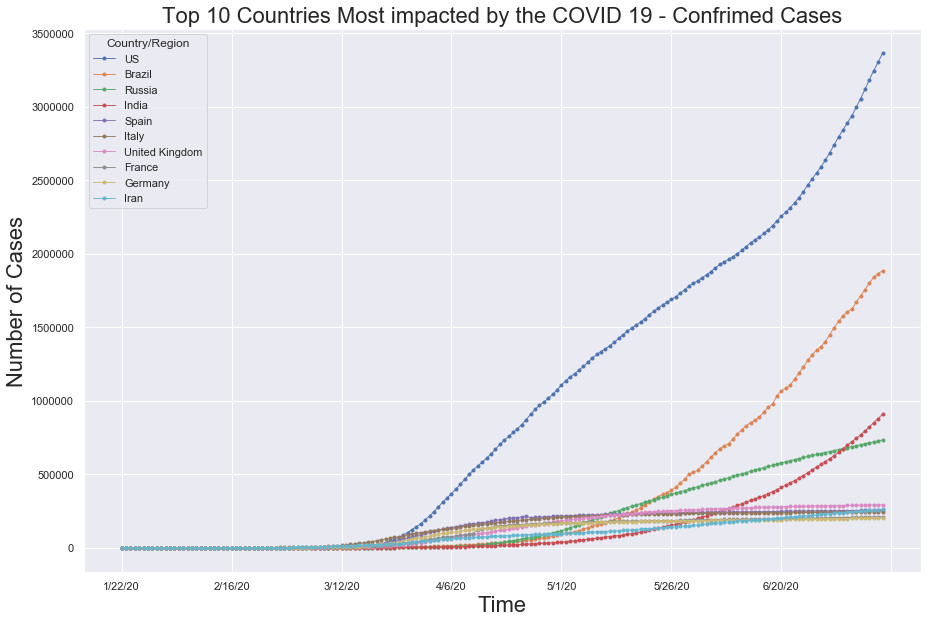

In [30]:
# Plot the Top 10 countries that has the most COVID 19 cases
confirmed_10.T.plot(figsize = (15, 10), linewidth=0.9, marker='.')
plt.title('Top 10 Countries Most impacted by the COVID 19 - Confrimed Cases', size = 22)
plt.xlabel('Time', size = 22)
plt.ylabel('Number of Cases', size = 22)
plt.show()

In [31]:
# Questions:
# How to Display the Month Name instaed of Number - dynamic, becasue it changes over time

# 1.2 US Covid 19 Data

In [32]:
US_confirmed = agg_confirmed[agg_confirmed['Country/Region'] == 'US']
US_death = agg_death[agg_death['Country/Region'] == 'US']
US_recovered = agg_recovered[agg_recovered['Country/Region'] == 'US']

In [33]:
US_total = pd.concat([US_confirmed, US_death, US_recovered]).T

In [34]:
#US_total = US_total.drop('Country/Region')
US_total.columns = ['confirmed', 'death', 'recover']
US_total = US_total.reset_index()

In [35]:
US_total.head()

,index,confirmed,death,recover
0,Country/Region,US,US,US
1,1/22/20,1,0,0
2,1/23/20,1,0,0
3,1/24/20,2,0,0
4,1/25/20,2,0,0


In [36]:
US_total = US_total.rename(columns = {'index': 'Date'})

In [37]:
US_total.reset_index(drop = True).head()

,Date,confirmed,death,recover
0,Country/Region,US,US,US
1,1/22/20,1,0,0
2,1/23/20,1,0,0
3,1/24/20,2,0,0
4,1/25/20,2,0,0


In [38]:
# Drop the old header
US_total = US_total.drop(0)

In [39]:
US_total.Date = pd.to_datetime(US_total.Date)

#df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True) 

In [40]:
US_total.head()

,Date,confirmed,death,recover
1,2020-01-22,1,0,0
2,2020-01-23,1,0,0
3,2020-01-24,2,0,0
4,2020-01-25,2,0,0
5,2020-01-26,5,0,0


In [41]:
US_total = US_total.set_index('Date')

In [42]:
US_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174 entries, 2020-01-22 to 2020-07-13
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   confirmed  174 non-null    object
 1   death      174 non-null    object
 2   recover    174 non-null    object
dtypes: object(3)
memory usage: 5.4+ KB


# 2. Stock Market Data

In [43]:
import yfinance as yf
import pandas_datareader as dr
import datetime

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [44]:
# Defining endpoint time stamp for extracting data
end = datetime.datetime.now().strftime('%Y-%m-%d')

In [45]:
# SMP 500 data  from Yahoo Finance
smp500 = dr.get_data_yahoo("SNP", start="2020-01-22", end= end)

In [46]:
# checking the first five rows of dataset
smp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-22,58.970001,58.02,58.950001,58.180000,169600.0,54.887253
2020-01-23,57.980000,57.02,57.599998,57.770000,227900.0,54.500458
2020-01-24,57.799999,56.84,57.730000,57.160000,146200.0,53.924980
2020-01-27,55.689999,54.82,55.139999,55.279999,230600.0,52.151379
2020-01-28,56.090000,55.16,55.490002,55.500000,174400.0,52.358929


In [47]:
# Note:
    # StockMarket prices are based on business days. However, to make sure of the accuracy of frequency
    # will set it to business day and will fill the missing value with linear interpolation techniques;

smp500 = smp500.asfreq('b').interpolate(method='linear')

In [48]:
smp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2020-01-22 to 2020-07-14
Freq: B
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       125 non-null    float64
 1   Low        125 non-null    float64
 2   Open       125 non-null    float64
 3   Close      125 non-null    float64
 4   Volume     125 non-null    float64
 5   Adj Close  125 non-null    float64
dtypes: float64(6)
memory usage: 6.8 KB


# 3. Merge COVID 19 and Stock Market prices data 

In [49]:
#Setting Frequency of US COVID 19 Data to business days - according to the stock market frequency
US_total_b = US_total.asfreq('b')

In [50]:
US_total_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2020-01-22 to 2020-07-13
Freq: B
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   confirmed  124 non-null    object
 1   death      124 non-null    object
 2   recover    124 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


In [51]:
#Chaning the data type from object to number
US_total_b = US_total_b.apply(pd.to_numeric)
US_total_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2020-01-22 to 2020-07-13
Freq: B
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   confirmed  124 non-null    int64
 1   death      124 non-null    int64
 2   recover    124 non-null    int64
dtypes: int64(3)
memory usage: 8.9 KB


# 3.1 Check dimensions of the two dataset

In [52]:
# First 5 rows of the two datasets:

print('The first 5 days of Stock Market data are; ', smp500.head())
print(' -------------------------')
print('The first 5 days of COVID 19 data are; ', US_total_b.head())

The first 5 days of Stock Market data are;                   High    Low       Open      Close    Volume  Adj Close
Date                                                                   
2020-01-22  58.970001  58.02  58.950001  58.180000  169600.0  54.887253
2020-01-23  57.980000  57.02  57.599998  57.770000  227900.0  54.500458
2020-01-24  57.799999  56.84  57.730000  57.160000  146200.0  53.924980
2020-01-27  55.689999  54.82  55.139999  55.279999  230600.0  52.151379
2020-01-28  56.090000  55.16  55.490002  55.500000  174400.0  52.358929
 -------------------------
The first 5 days of COVID 19 data are;              confirmed  death  recover
Date                                 
2020-01-22          1      0        0
2020-01-23          1      0        0
2020-01-24          2      0        0
2020-01-27          5      0        0
2020-01-28          5      0        0


In [53]:
# Last 5 rows of the two datasets:
print('The 5 last days of Stock Market data are; ', smp500.tail())
print(' -------------------------')
print('The 5 last days of COVID 19 data are; ', US_total_b.tail())

The 5 last days of Stock Market data are;                   High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2020-07-08  45.310001  44.279999  44.590000  45.200001  357100.0  45.200001
2020-07-09  45.470001  44.290001  45.000000  44.590000  215800.0  44.590000
2020-07-10  44.500000  43.880001  44.119999  44.349998  103800.0  44.349998
2020-07-13  44.720001  43.959999  44.240002  43.959999   87800.0  43.959999
2020-07-14  44.270000  43.480000  43.540001  44.270000  106061.0  44.270000
 -------------------------
The 5 last days of COVID 19 data are;              confirmed   death  recover
Date                                  
2020-07-07    2996098  131480   936476
2020-07-08    3054699  132300   953462
2020-07-09    3117946  133290   969111
2020-07-10    3184573  134092   983185
2020-07-13    3363056  135605  1031939


In [54]:
# sorting the two datasets by the index - by date
US_total_b = US_total_b.sort_index()
smp500 = smp500.sort_index()

## 3.2 Merge the two datasets 

In [55]:
# Merge two dataset and linear interpolate the missing values
stock_covid_df = pd.concat([US_total_b, smp500], axis = 1).interpolate(method='linear')

In [56]:
# First 5 rows of the combined datasets
stock_covid_df.head()

,confirmed,death,recover,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,,
2020-01-22,1.0,0.0,0.0,58.970001,58.02,58.950001,58.180000,169600.0,54.887253
2020-01-23,1.0,0.0,0.0,57.980000,57.02,57.599998,57.770000,227900.0,54.500458
2020-01-24,2.0,0.0,0.0,57.799999,56.84,57.730000,57.160000,146200.0,53.924980
2020-01-27,5.0,0.0,0.0,55.689999,54.82,55.139999,55.279999,230600.0,52.151379
2020-01-28,5.0,0.0,0.0,56.090000,55.16,55.490002,55.500000,174400.0,52.358929


## 3. 3 Exploring the merged dataset

In [57]:
stock_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2020-01-22 to 2020-07-14
Freq: B
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   confirmed  125 non-null    float64
 1   death      125 non-null    float64
 2   recover    125 non-null    float64
 3   High       125 non-null    float64
 4   Low        125 non-null    float64
 5   Open       125 non-null    float64
 6   Close      125 non-null    float64
 7   Volume     125 non-null    float64
 8   Adj Close  125 non-null    float64
dtypes: float64(9)
memory usage: 9.8 KB


In [58]:
#Missing values in the dataset
stock_covid_df.isnull().sum()

confirmed    0
death        0
recover      0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [59]:
# Check the duplicate
stock_covid_df.duplicated().sum()

0

In [60]:
stock_covid_df.describe()

,confirmed,death,recover,High,Low,Open,Close,Volume,Adj Close
count,1.250000e+02,125.000000,1.250000e+02,125.000000,125.000000,125.000000,125.000000,1.250000e+02,125.000000
mean,9.868586e+05,52156.280000,2.317435e+05,49.049000,47.988560,48.581920,48.526840,2.545681e+05,46.423846
std,1.022857e+06,51888.272506,2.985064e+05,3.951431,4.013065,4.046988,3.965071,1.433646e+05,3.197516
min,1.000000e+00,0.000000,0.000000e+00,42.020000,41.299999,41.880001,41.830002,8.780000e+04,39.755051
25%,1.740000e+02,12.000000,7.000000e+00,45.580000,44.560001,45.000000,45.200001,1.604000e+05,44.139999
50%,7.019960e+05,38056.000000,5.854500e+04,48.389999,47.500000,47.970001,47.810001,2.251000e+05,45.660763
75%,1.816476e+06,106136.000000,4.582310e+05,52.279999,51.099998,51.910000,51.669998,3.008000e+05,48.745689
max,3.363056e+06,135605.000000,1.031939e+06,58.970001,58.020000,58.950001,58.180000,1.103800e+06,54.887253


## 4.4 Extracting the Required columns

In [61]:
df = stock_covid_df[['confirmed', 'death', 'recover', 'Adj Close']]

In [62]:
# rename the market price columns
df = df.rename(columns = {'Adj Close': 'market_price'})

In [63]:
df.head()

,confirmed,death,recover,market_price
Date,,,,
2020-01-22,1.0,0.0,0.0,54.887253
2020-01-23,1.0,0.0,0.0,54.500458
2020-01-24,2.0,0.0,0.0,53.924980
2020-01-27,5.0,0.0,0.0,52.151379
2020-01-28,5.0,0.0,0.0,52.358929


In [64]:
# Changing the order of columns - Market price is dependent varialbe 
df = df[['market_price','confirmed', 'death', 'recover']]

In [65]:
df.head()

,market_price,confirmed,death,recover
Date,,,,
2020-01-22,54.887253,1.0,0.0,0.0
2020-01-23,54.500458,1.0,0.0,0.0
2020-01-24,53.924980,2.0,0.0,0.0
2020-01-27,52.151379,5.0,0.0,0.0
2020-01-28,52.358929,5.0,0.0,0.0


# 4. Explore the Data

## 4.1 Data Profiling

In [66]:
# Load Pandas profiling package
from pandas_profiling import ProfileReport

In [67]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [68]:
profile